# Chapter 2

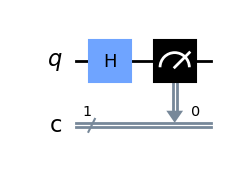

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit import BasicAer

#Create Marble Circuit
marble_circuit = QuantumCircuit(1, 1) # add one qubit (Whiskerton marble) and one classical bit (to store the measurement outcome)
marble_circuit.h(0) # add H-gate or Hadamard gate to the qubit (this is the quantum gate that puts the marble in superposition)
marble_circuit.measure(0,0) # add a measurement operator (this is equivalent to a cat looking directly at a marble)
marble_circuit.draw('mpl') # see how the circuit looks

In [2]:
#Run Marble Circuit,
#That is, see if the marble turns red or blue

marble_state = {'1': 'red', '0': 'blue'}
simulator = BasicAer.get_backend("qasm_simulator") # Identify the quantum computer to run this on. In this case it's a simulator not a real device.
compiled_circuit = transpile(marble_circuit, simulator) # Compile the circuit down to low-level QASM instructions.
shots = 1000
job = simulator.run(compiled_circuit, shots=shots) # Run the circuit on the simulator 1000 times to gather statistics.

# fetch and print the outcome:
result = job.result() 
counts = result.get_counts(compiled_circuit)

ans = str(max(counts, key=counts.get))

print(f"The marble is {marble_state[ans]}.") # The outcome is the one associated with the highest count.

The marble is blue.


Your result in the form of counts: {'0': 503, '1': 497}
Thus, in 1000 shots, you get blue 503 times, and red 497 times.


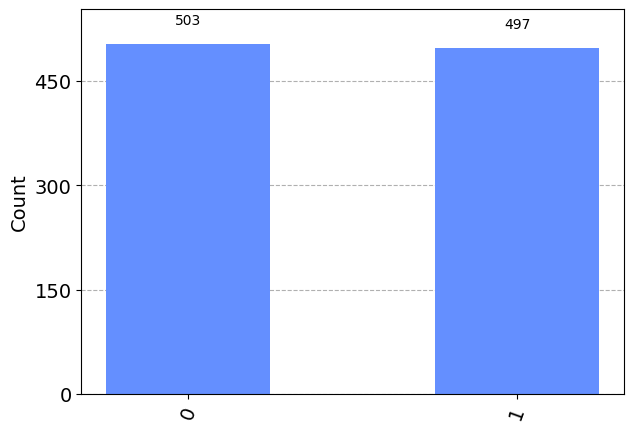

In [3]:
# Examine the statistics and plot histogram

print(f"Your result in the form of counts: {counts}")
print(f"Thus, in {shots} shots, you get blue {counts['0']} times, and red {counts['1']} times.")

plot_histogram(counts)

# Chapter 3

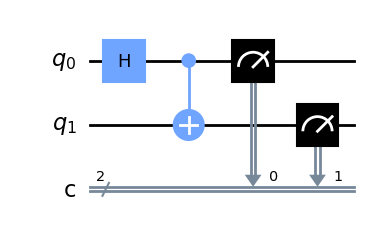

In [4]:
#Create Doorbell Entangler Circuit
doorbell_circuit = QuantumCircuit(2, 2) # Create a circuit with two qubits (Whiskerton marbles) and two classical bits (to store the measurement outcome).
doorbell_circuit.h(0) # Add a Hadamard gate to the first qubit/ 
doorbell_circuit.cx(0,1) # Add a cnot gate with the first qubit as the control and the second qubit as the target. The target flips its state when the control is in the 1 state.
doorbell_circuit.measure([0,1],[0,1]) # Add measurement operators (this is equivalent to a cat looking directly at the outer marble).
doorbell_circuit.draw('mpl') # See how the circuit looks.

In [5]:
# Run the doorbell circuit
compiled_circuit = transpile(doorbell_circuit, simulator) # Compile the circuit down to low-level QASM instructions.
job = simulator.run(compiled_circuit, shots=1000) # Run the circuit on the simulator 1000 times to gather statistics.

# fetch and print the outcome:
result = job.result() 
counts = result.get_counts(compiled_circuit)
counts

{'11': 489, '00': 511}

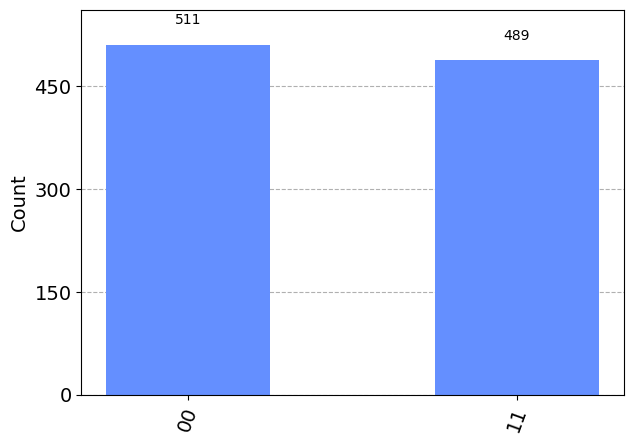

In [6]:
# Examine the statistics and plot histogram
plot_histogram(counts)